In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [111]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'])


In [115]:
df

,date,value,month,year
10,2016-05-19,19736,5,2016
17,2016-05-26,18060,5,2016
18,2016-05-27,19997,5,2016
19,2016-05-28,19044,5,2016
20,2016-05-29,20325,5,2016
...,...,...,...,...
1294,2019-11-24,138875,11,2019
1299,2019-11-29,171584,11,2019
1300,2019-11-30,141161,11,2019
1301,2019-12-01,142918,12,2019


In [112]:
#cleaning data 
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & 
            (df['value'] <= df['value'].quantile(0.975))]


In [97]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


C:\Users\Aadam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


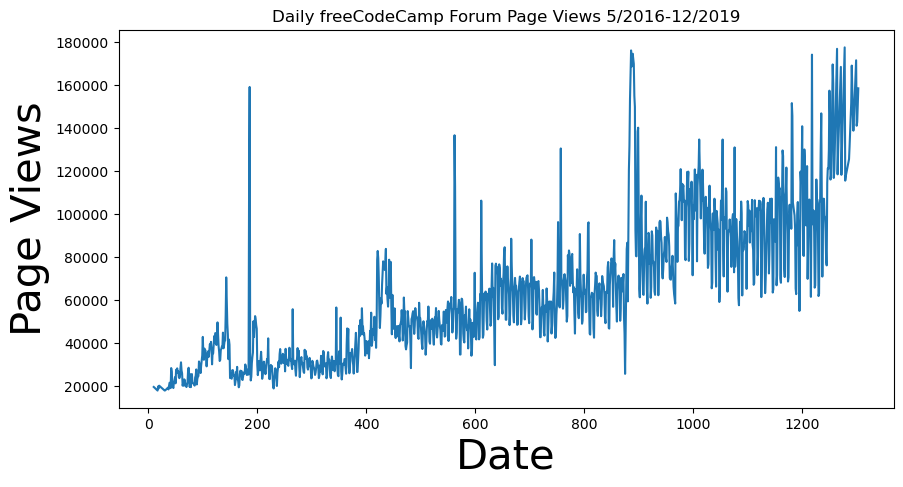

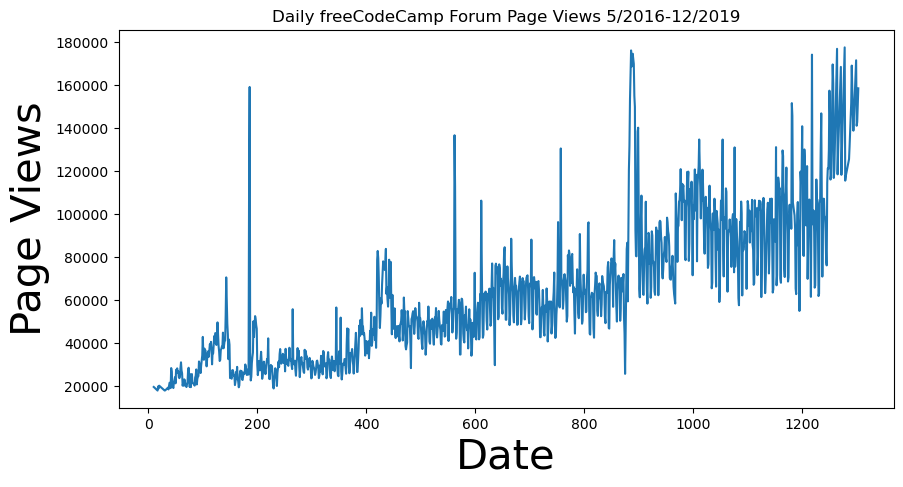

In [113]:
def line_graph():
 fig,ax = plt.subplots(figsize=(10, 5), dpi=100)
 ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
 ax.set_xlabel("Date",fontsize=30)
 ax.set_ylabel("Page Views",fontsize=30)
 sns.lineplot(df.index,df['value'])
 return fig
line_graph()

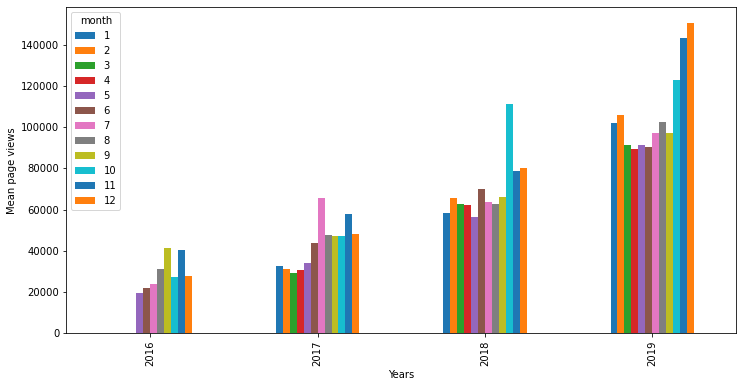

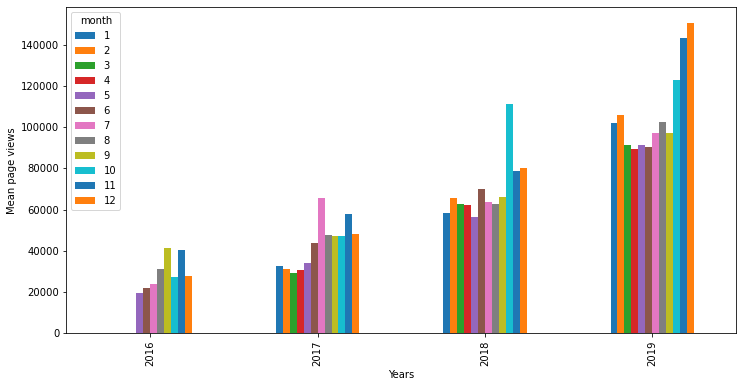

In [125]:

def bar_plot():

 df['month'] = df.date.dt.month
 df['year'] = df.date.dt.year

#finding avergae values for each month in the year 
 df_bar = df.groupby(['year','month'])['value'].mean()
 df_bar = df_bar.unstack()
#draw plot
 fig = df_bar.plot.bar(legend=True,figsize=(12,6),ylabel='Mean page views',
                       xlabel='Years').figure
 plt.legend=(['January','Febuary','March','April','May','June',
        'July','August','September','October','November','December'])
 fig.savefig('bar_plot.png')
 return fig
bar_plot()
    


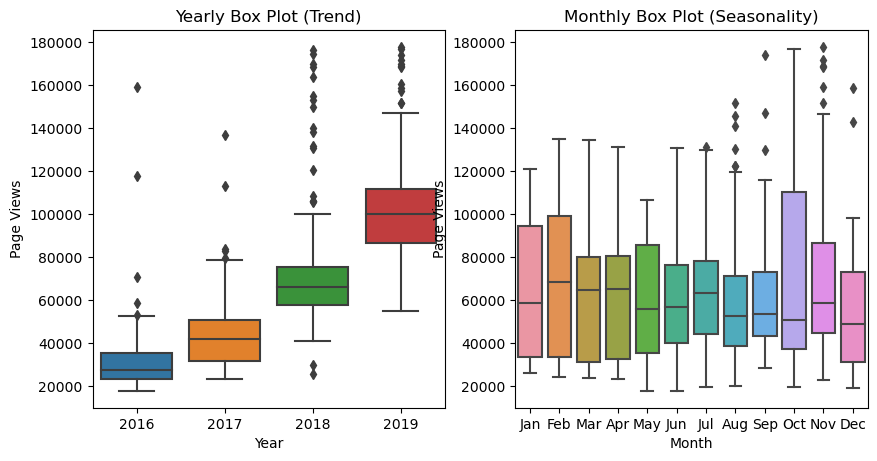

In [127]:

# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
    
    # Yearly boxplot
sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
axes[0].set_title("Yearly Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
    
    # Monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
axes[1].set_title("Monthly Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
fig.savefig('box_plot.png')
   

In [129]:
sns.barplot(data=df_box, x="year", y="value", ax=axes[0])
axes[0].set_title("Yearly Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

Text(24.0, 0.5, 'Page Views')